In [ ]:
# Sai Triveni Kottapalli
# ID - C00313481  

# Naive Bayes

Naive Bayes models are a set of fast and straightforward classification algorithms that work well with very high-dimensional datasets. Due to their speed and minimal tunable parameters, they often serve as a useful quick and simple baseline for classification problems.

This chapter will explain how naive Bayes classifiers work, followed by a few examples.

## Bayesian Classification

Naive Bayes classifiers are based on Bayesian classification methods, which utilize Bayes's theorem. This theorem describes the relationship between conditional probabilities of statistical quantities. 

In the context of Bayesian classification, we aim to determine the probability of a label $L$ given certain observed features, written as $P(L~|~{\rm features})$. Bayes's theorem provides a way to express this probability in terms of quantities that we can compute more directly.

Naive Bayes classifiers are built on Bayesian classification methods.

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

To compute $P({\rm features}~|~L_i)$ for each label, we need a model. This model is referred to as a *generative model* because it describes the hypothetical random process that generates the data. Defining this generative model for each label is an important part of training a Bayesian classifier.

The general approach to this training step can be quite difficult, but we can simplify the process by making certain assumptions about the model. This is where the term "naive" in "naive Bayes" comes into action: by making basic assumptions about the generative model for each label, we can achieve a rough approximation of the model for each class and then move forward with Bayesian classification.

Different types of naive Bayes classifiers are based on various naive assumptions about the data, and we will explore some of these in the following sections.

## Importing the libraries

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings("ignore")

## Gaussian Naive Bayes

Gaussian naive Bayes is one of the simplest naive Bayes classifiers to understand. This classifier assumes that the data corresponding to each label is drawn from a straightforward Gaussian distribution.

In [3]:
# changed no. of samples to 50, cluster_std = 2
# plotting scatter plot more efficiently by adding labels and changing colors

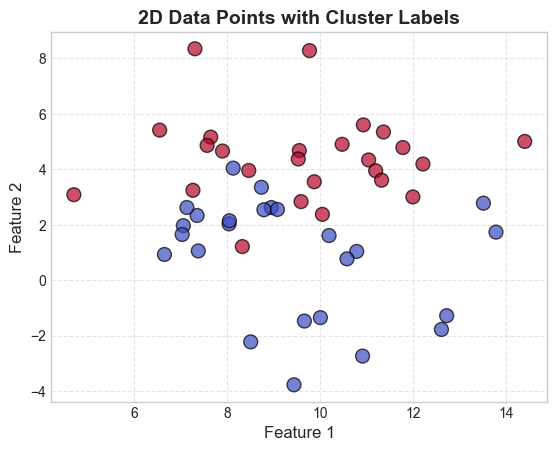

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, n_features=2, centers=2, random_state=4, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("2D Data Points with Cluster Labels", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The simplest Gaussian model assumes that the data follows a Gaussian distribution with no covariance between dimensions.

This model can be fitted by calculating the mean and standard deviation of the points for each label, which is all that is needed to define such a distribution.

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's `sklearn.naive_bayes.GaussianNB` estimator:

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Let's generate some new data:

In [6]:
# changed Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2) to Xnew = np.array([-8, -10]) + np.array([12, 20]) * rng.rand(2000, 2)

In [7]:
rng = np.random.RandomState(0)
Xnew = np.array([-8, -10]) + np.array([12, 20]) * rng.rand(2000, 2)
ynew = model.predict(Xnew)
print("New predictions generated successfully.")

New predictions generated successfully.


Now we can plot this new data to get an idea of where the decision boundary is:

In [8]:
# plotting scatter plot more efficiently by adding labels and changing colors

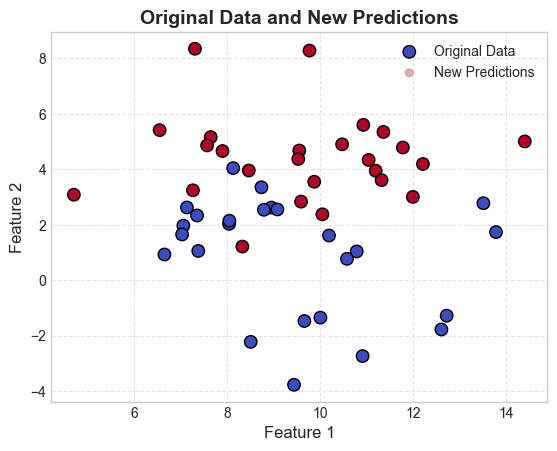

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='coolwarm', edgecolors='k', label="Original Data")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=30, cmap='coolwarm', alpha=0.3, label="New Predictions")
plt.axis(lim)
plt.title("Original Data and New Predictions", fontsize=14, fontweight="bold")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The boundary in the classifications is slightly curved, as the Gaussian naive Bayes model typically generates a quadratic boundary. 

A key advantage of this approach is its ability to provide probabilistic classification through the `predict_proba` method, which returns the posterior probabilities for the first and second labels.

In [11]:
yprob = model.predict_proba(Xnew)
print(yprob[-8:].round(2))

[[0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.02 0.98]
 [1.   0.  ]]


Bayesian methods are useful for estimating uncertainty in classifications. However, the quality of the final classification depends on the accuracy of the underlying model assumptions, which can sometimes limit the effectiveness of Gaussian naive Bayes. Still, in many cases, especially with a large number of features, it remains a reliable classification method.

## Multinomial Naive Bayes

The Gaussian assumption described earlier is just one of many simple assumptions that can be used to define the generative distribution for each label. Another helpful example is multinomial naive Bayes, which assumes that the features are generated from a basic multinomial distribution.

The multinomial distribution represents the probability of observing counts across different categories, making multinomial naive Bayes particularly suitable for features that denote counts or count rates.

The concept remains the same as before; however, instead of modelling the data distribution using the best-fit Gaussian, we now model it using the best-fit multinomial distribution.

### Example: Classifying Text

Multinomial naive Bayes is commonly utilized in text classification, where the features represent word counts or frequencies found within the documents being classified.

Let's download the data and examine the target names.

# GaussianNB

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [13]:
# Loading Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target labels

In [14]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Creating and training Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [16]:
# Making predictions on test data
y_pred = nb_model.predict(X_test)

In [17]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


# MultinomialNB

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [19]:
# Loading Digits dataset
digits = load_digits()
X = digits.data  # Feature matrix
y = digits.target  # Target labels

In [20]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Creating and training Naive Bayes model (MultinomialNB)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Making predictions on test data
y_pred = nb_model.predict(X_test)

In [23]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.11%


# BernoulliNB

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [25]:
# Loading Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data  # Feature matrix
y = cancer.target  # Target labels (0 for benign, 1 for malignant)

In [26]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Creating and training Naive Bayes model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

BernoulliNB()

In [28]:
# Making predictions on test data
y_pred = nb_model.predict(X_test)

In [29]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 62.28%


Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Naive Bayes classifiers have strict assumptions about data, which typically results in lower performance compared to more complex models. However, they offer several advantages:

- Fast training and prediction
- Straightforward probabilistic predictions
- Easy interpretation
- Few tunable parameters

These benefits make naive Bayes a good choice for an initial classification baseline. If it performs well, you have a fast and interpretable solution. If not, you can explore more complex models with a clearer understanding of their potential.

Naive Bayes performs particularly well in specific scenarios:

- When its assumptions align with the data (rare in practice)
- In cases of well-separated categories, where complexity is less important
- With high-dimensional data, where model complexity is also less critical

As dimensionality increases, points tend to be more separated, allowing simple classifiers to perform effectively. With sufficient data, a simple model can be quite powerful.
